In [16]:
import numpy as ns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plx



In [27]:
df= pd.read_csv(r'C:\Users\rjhon\OneDrive\Documents\travel market.csv')


In [20]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [22]:

df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [26]:
df.describe()


,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


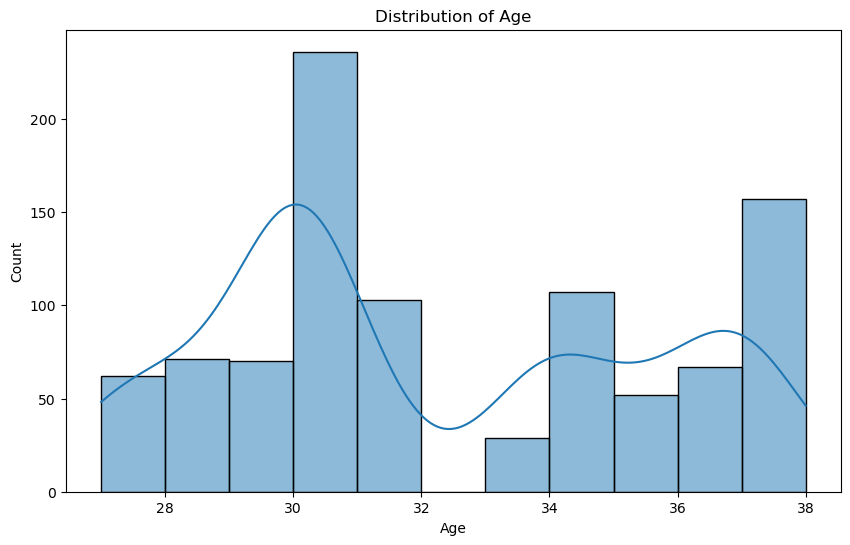

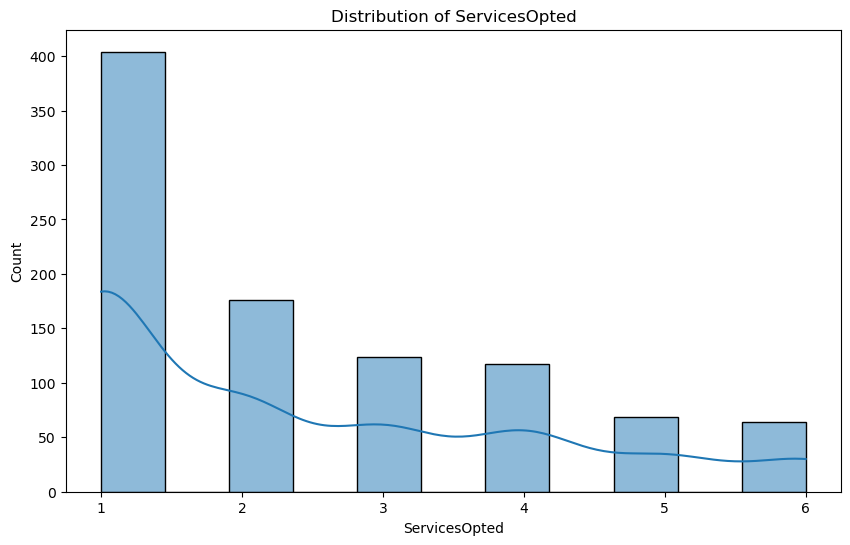

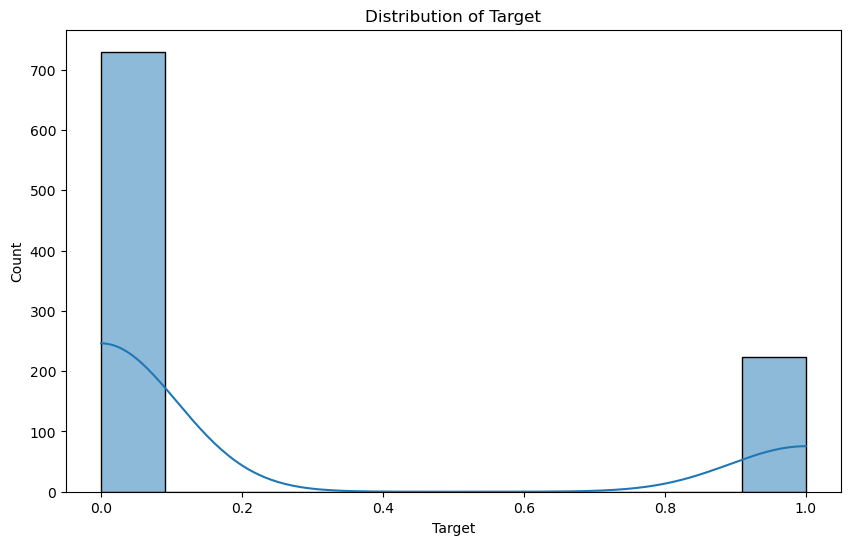

In [32]:

# Example: Distribution of numerical columns
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


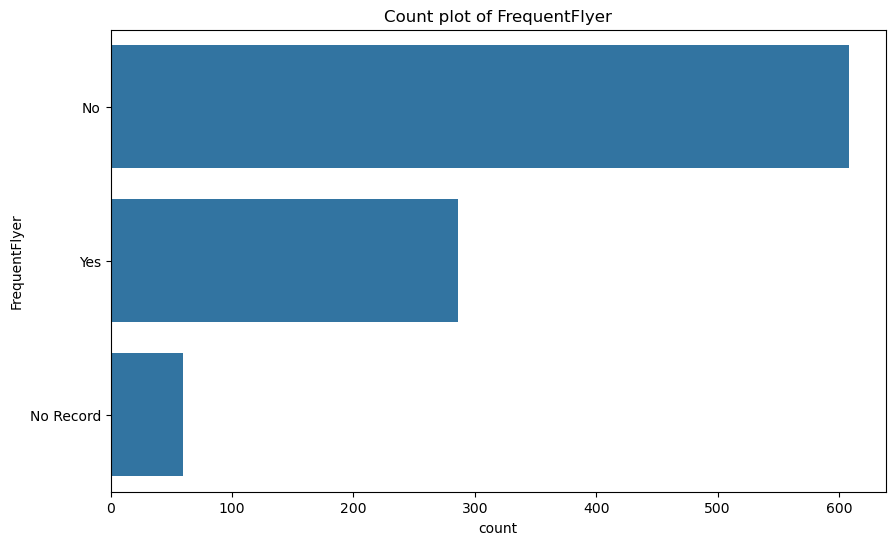

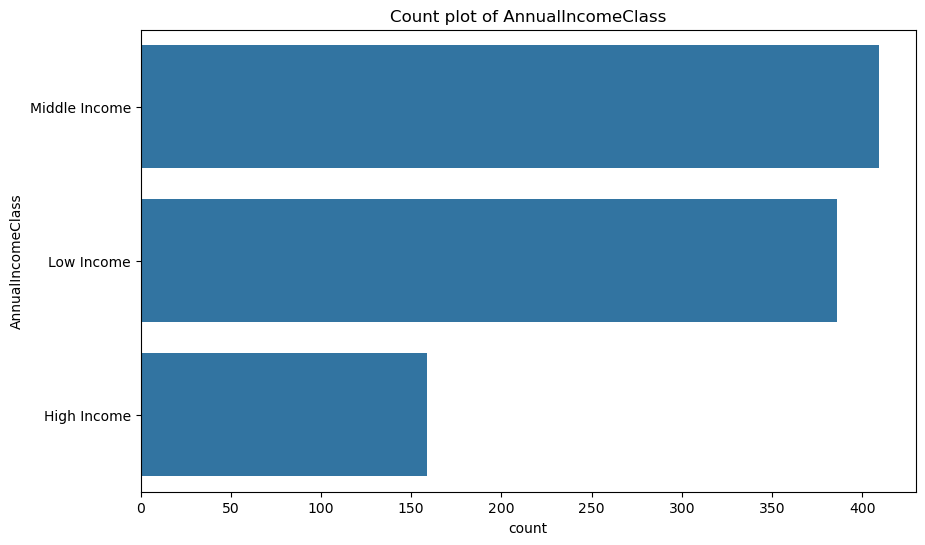

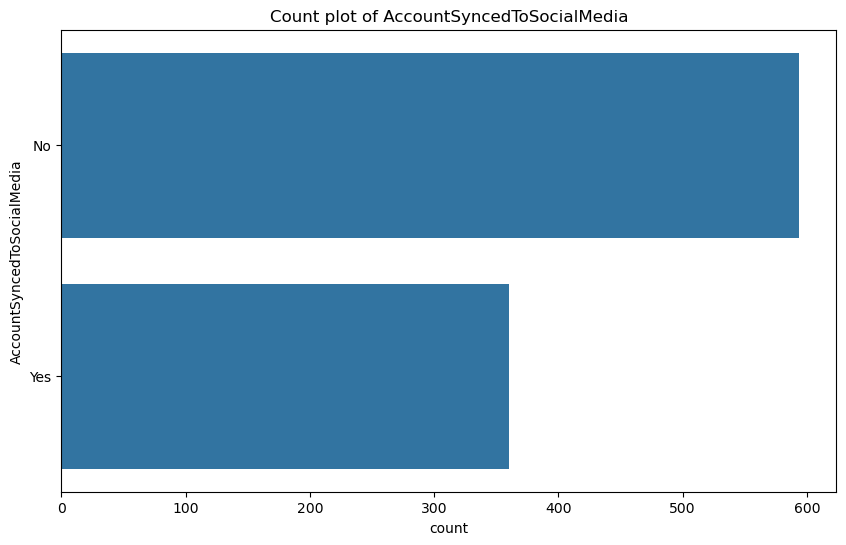

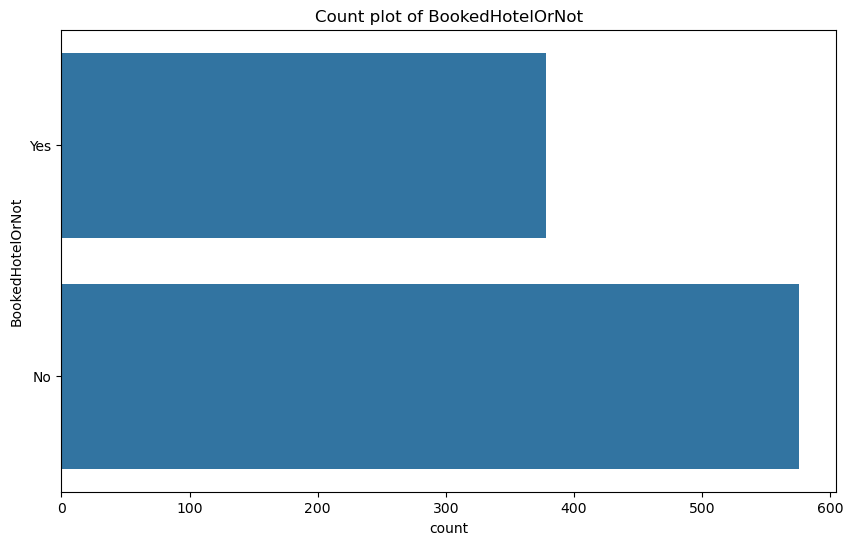

In [33]:
# Example: Count plot for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df)
    plt.title(f'Count plot of {column}')
    plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Ensure the target column is correctly named
target_column = 'Target'  # Adjust if needed

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

# Define features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Check if the target column is binary
if y.nunique() != 2:
    raise ValueError(f"Target column '{target_column}' should be binary for classification.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing complete. Data is ready for modeling.")


Data preprocessing complete. Data is ready for modeling.


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf_clf))
print(confusion_matrix(y_test, y_pred_rf_clf))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       153
           1       0.70      0.55      0.62        38

    accuracy                           0.86       191
   macro avg       0.80      0.75      0.77       191
weighted avg       0.86      0.86      0.86       191

[[144   9]
 [ 17  21]]
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       153
           1       0.73      0.63      0.68        38

    accuracy                           0.88       191
   macro avg       0.82      0.79      0.80       191
weighted avg       0.87      0.88      0.88       191

[[144   9]
 [ 14  24]]


In [51]:
import joblib

# Save the Random Forest model
joblib.dump(rf_clf, 'random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [38]:
print(df.columns)


Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')


In [40]:
print(df[['Age', 'AnnualIncomeClass']].dtypes)


Age                  int64
AnnualIncomeClass    int32
dtype: object


In [52]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['AnnualIncomeClass'] = pd.to_numeric(df['AnnualIncomeClass'], errors='coerce')


In [42]:
df['AgeIncomeProduct'] = df['Age'] * df['AnnualIncomeClass']


In [43]:
print(df.head())


   Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0   34              0                  2              6   
1   34              2                  1              5   
2   37              0                  2              3   
3   30              0                  2              2   
4   30              0                  1              1   

   AccountSyncedToSocialMedia  BookedHotelOrNot  Target  AgeIncomeProduct  
0                           0                 1       0                68  
1                           1                 0       1                34  
2                           1                 0       0                74  
3                           0                 0       0                60  
4                           0                 0       0                30  


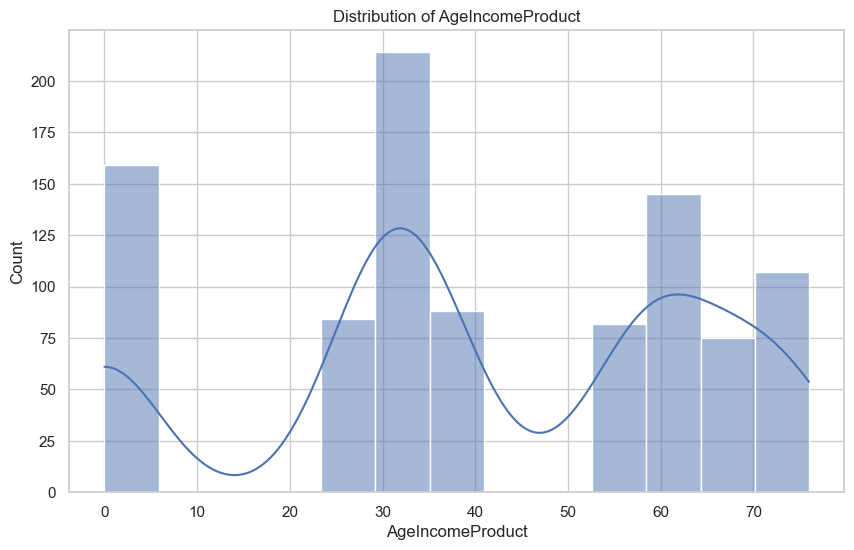

In [64]:


# Example: Distribution of AgeIncomeProduct
plt.figure(figsize=(10, 6))
sns.histplot(df['AgeIncomeProduct'], kde=True)
plt.title('Distribution of AgeIncomeProduct')
plt.show()



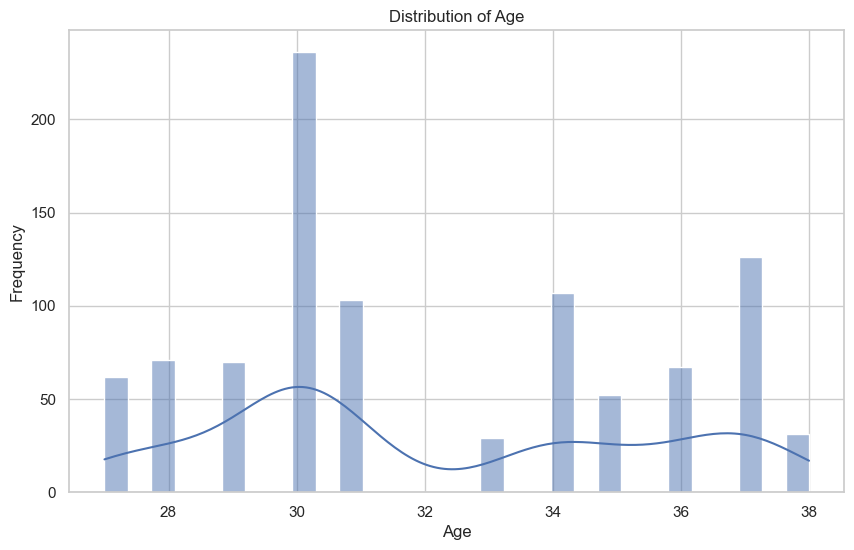

In [65]:
# Distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


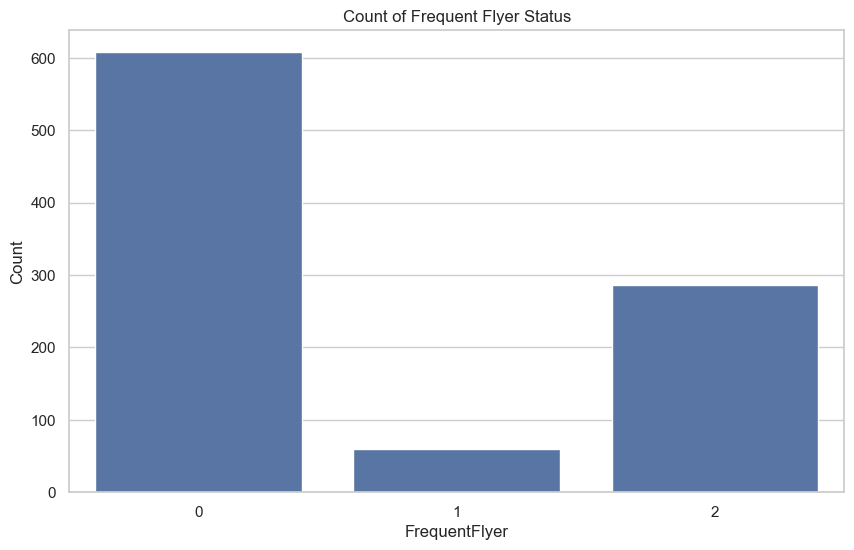

In [56]:
# Count plot for FrequentFlyer
plt.figure(figsize=(10, 6))
sns.countplot(x='FrequentFlyer', data=df)
plt.title('Count of Frequent Flyer Status')
plt.xlabel('FrequentFlyer')
plt.ylabel('Count')
plt.show()


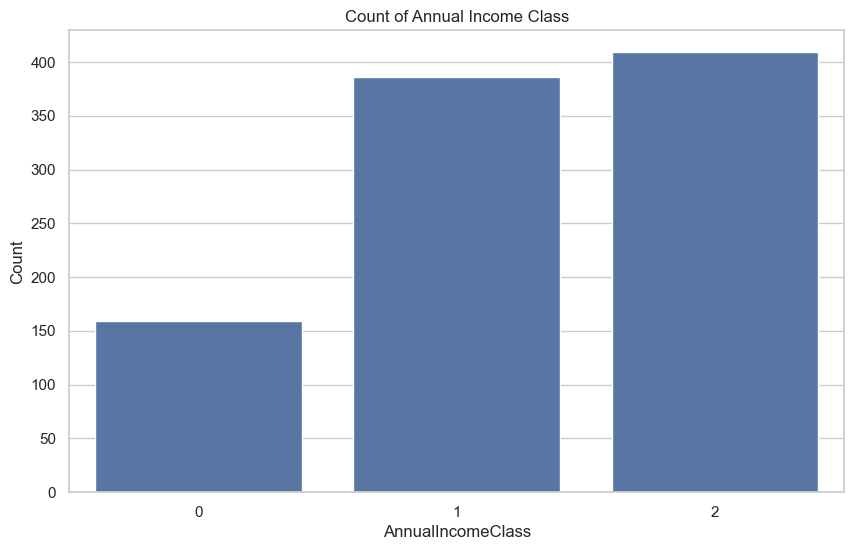

In [57]:
# Count plot for AnnualIncomeClass
plt.figure(figsize=(10, 6))
sns.countplot(x='AnnualIncomeClass', data=df)
plt.title('Count of Annual Income Class')
plt.xlabel('AnnualIncomeClass')
plt.ylabel('Count')
plt.show()

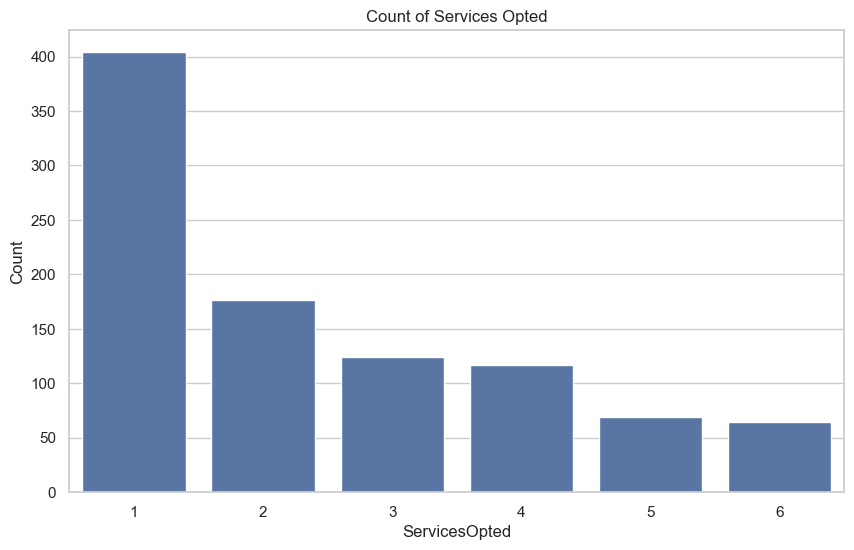

In [58]:
# Count plot for ServicesOpted
plt.figure(figsize=(10, 6))
sns.countplot(x='ServicesOpted', data=df)
plt.title('Count of Services Opted')
plt.xlabel('ServicesOpted')
plt.ylabel('Count')
plt.show()


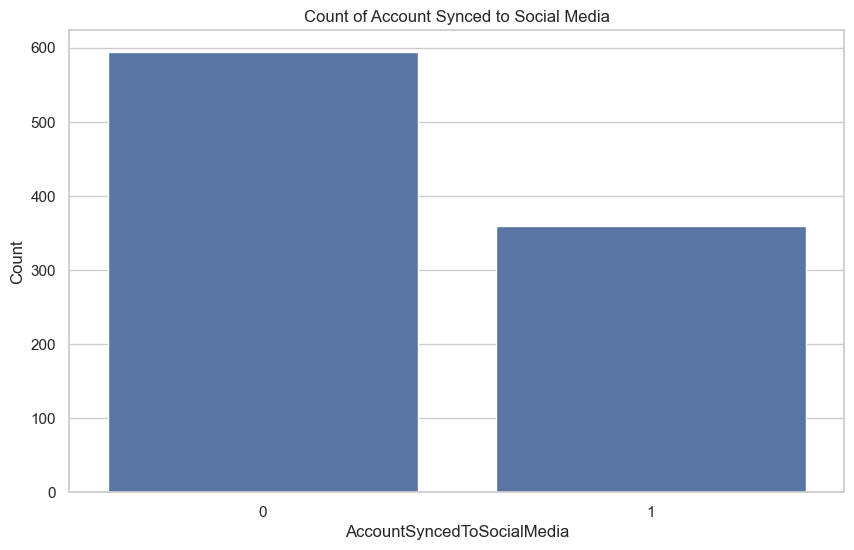

In [59]:
# Count plot for AccountSyncedToSocialMedia
plt.figure(figsize=(10, 6))
sns.countplot(x='AccountSyncedToSocialMedia', data=df)
plt.title('Count of Account Synced to Social Media')
plt.xlabel('AccountSyncedToSocialMedia')
plt.ylabel('Count')
plt.show()


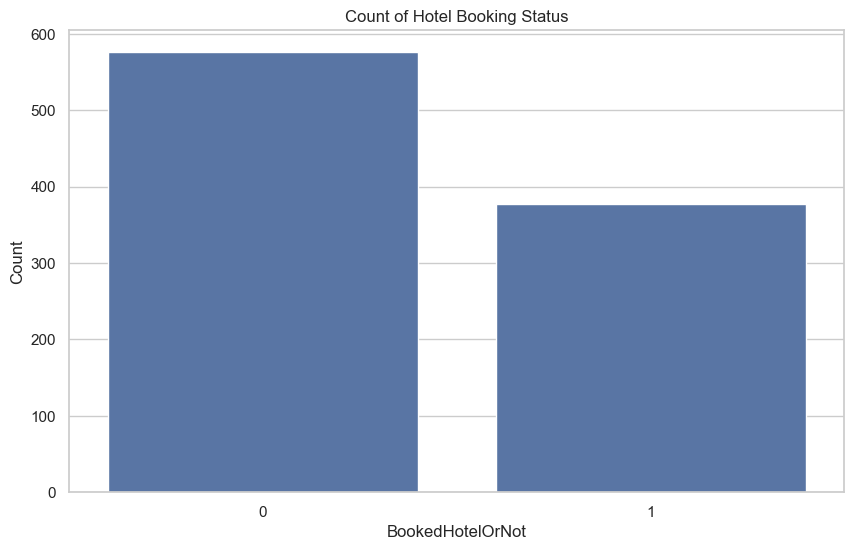

In [60]:
# Count plot for BookedHotelOrNot
plt.figure(figsize=(10, 6))
sns.countplot(x='BookedHotelOrNot', data=df)
plt.title('Count of Hotel Booking Status')
plt.xlabel('BookedHotelOrNot')
plt.ylabel('Count')
plt.show()


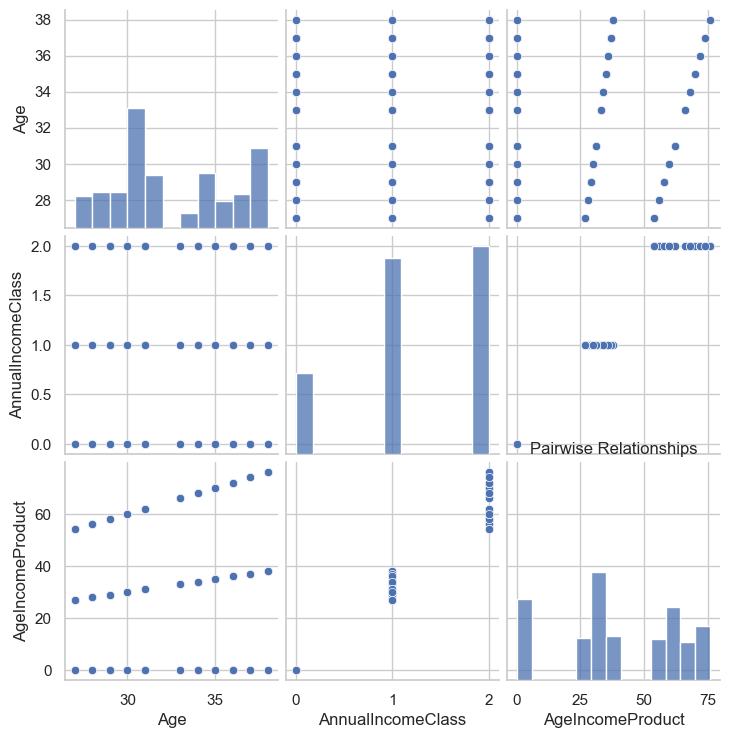

In [61]:
# Pairwise relationships between numerical features including the new feature
sns.pairplot(df[['Age', 'AnnualIncomeClass', 'AgeIncomeProduct']].dropna())
plt.title('Pairwise Relationships')
plt.show()


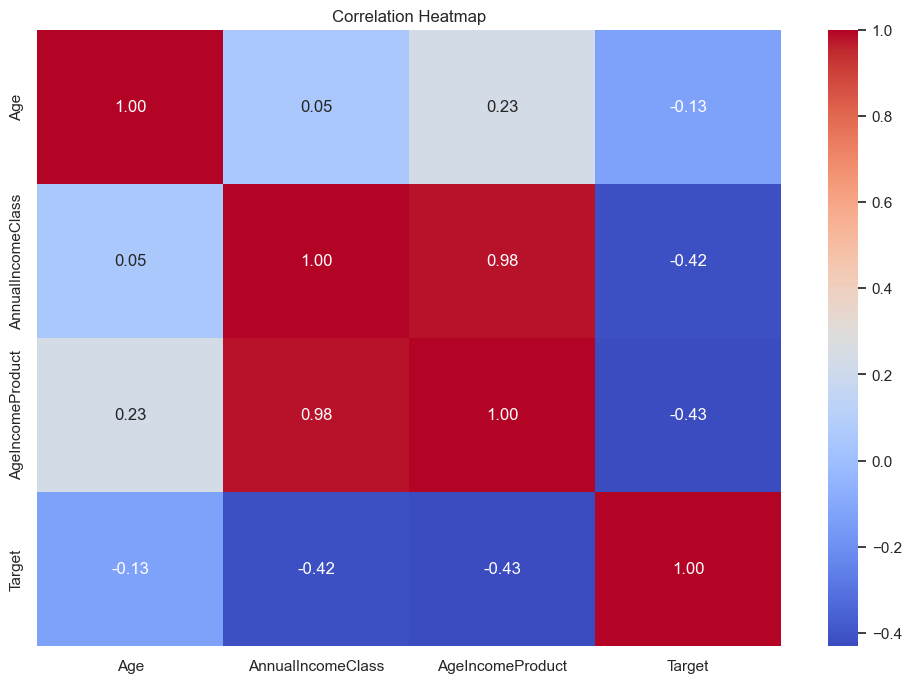

In [62]:
# Correlation heatmap including the new feature
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Age', 'AnnualIncomeClass', 'AgeIncomeProduct', 'Target']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()